In [17]:
import shapely
import fastkml as kml
from sentinelhub import FisRequest, BBox, Geometry, CRS, WcsRequest, CustomUrlParam, \
    DataSource, HistogramType, WebFeatureService,DataCollection

In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from shapely.geometry import shape, Polygon, MultiPolygon, MultiLineString

from sentinelhub import FisRequest, BBox, Geometry, CRS, WcsRequest, CustomUrlParam, \
    DataSource, HistogramType, WebFeatureService,DataCollection
from sentinelhub.time_utils import iso_to_datetime
import json
import os
from sentinelhub import SHConfig,WebFeatureService, BBox, CRS, DataSource

In [19]:
config = SHConfig()
config.sh_client_id = '6b151007-e09f-4aa7-85ea-3f99ed8ea007'
config.sh_client_secret = 'r*5V8ppyZ>Yt}@||%zvIK-K4_JcooF.NIi+gvKe:'
config.instance_id = 'a133ef7f-d177-470e-9b55-8bffd1ff16e6'

In [20]:
def fis_data_to_dataframe(k,fis_data, clm_data):
    """ Creates a DataFrame from list of FIS responses
    """
    COLUMNS = ['place','date', 'min_msavi', 'max_msavi', 'mean_msavi', 'stDev_msavi', 'cloudcover']
    data = []
    fis_data = fis_data[0]['C0']
    clm_data = clm_data[0]['C0']
    cnt =0
    for stats, clm_stats in zip(fis_data,clm_data):
        row = []
        row.append(k)
        row.append(stats['date'])
        row.extend(list((stats['basicStats']).values()))
        row.append(clm_stats['basicStats']['mean'])
        cnt+= 1
        data.append(row)
    
    return pd.DataFrame(data, columns=COLUMNS).sort_values(['date'])

In [21]:
dir_path = r'F:/kawa space task/kml/'
pol=[]
pol_a=[]
keys = list(range(1,4))
for ind in keys:
    aoi_path = dir_path + "place" + str(ind) + ".kml" 
    #aoi_path=r'F:/kawa space task/kml/place2.kml'
    with open(aoi_path, 'rb') as myfile:
        doc=myfile.read()
        k=kml.KML()
        k.from_string(doc)
        p=(list(list(k.features())[0].features())[0].geometry,CRS.WGS84)
        time_interval = ('2020-01-31', '2020-06-30')
        a = (Geometry(Polygon([(x[0],x[1]) for x in list(p[0].exterior.coords)]), CRS.WGS84))
        fis_request = FisRequest(
                layer='MSAVI-2',
                geometry_list=[a],
                time=time_interval,
                resolution='10m',
                data_folder= 'F:/kawa space task/request/%03d'%ind,
                maxcc = 0.6,
                config=config
                )
        clm_request = FisRequest(
            layer='CLM',
            geometry_list=[a],
            time=time_interval,
            resolution='10m',
            data_folder='F:/kawa space task/request/%03d'%ind,
            maxcc = 0.6,
            config=config
            )
        fis_data = fis_request.get_data(save_data=True)
        clm_data = clm_request.get_data(save_data=True)
        df = fis_data_to_dataframe(ind, fis_data, clm_data)
        df.to_csv(r'F:/kawa space task/data.csv', index=False ,mode='a')
        

C:\Users\user\anaconda3\lib\site-packages\sentinelhub\data_collections.py:564: SHDeprecationWarning: In the future please specify data_collection parameter, for now taking DataCollection.SENTINEL2_L1C
  warnings.warn('In the future please specify data_collection parameter, for now taking '


In [22]:
import datetime

In [23]:
import plotly.graph_objects as go
from datetime import datetime as datetime
import matplotlib.pyplot as plt

In [24]:
df= pd.read_csv('F:/kawa space task/data.csv')

In [25]:
df = df[df.cloudcover != 'cloudcover']
df = df[df['cloudcover'].astype('float')  < 0.40]
df.to_csv(r'F:/kawa space task/data_cloudmasked.csv')

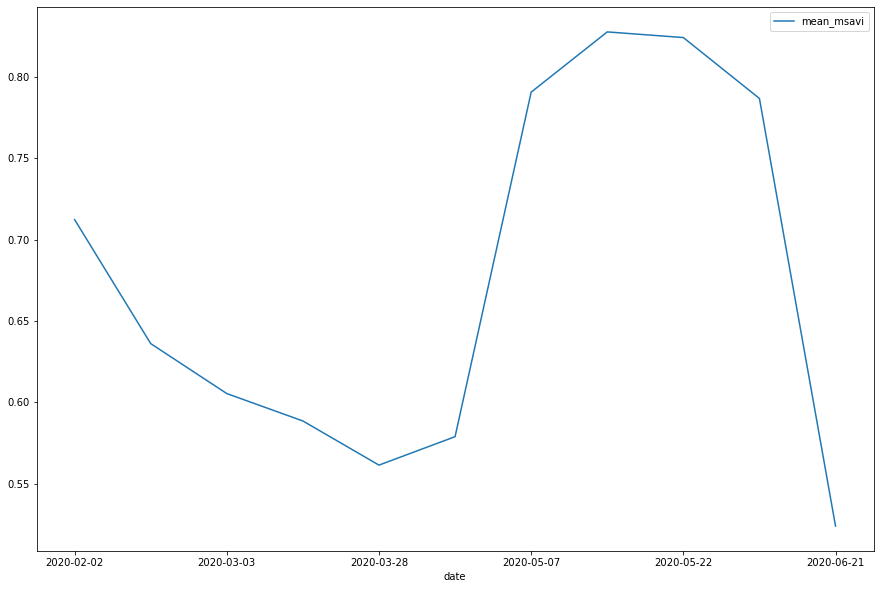

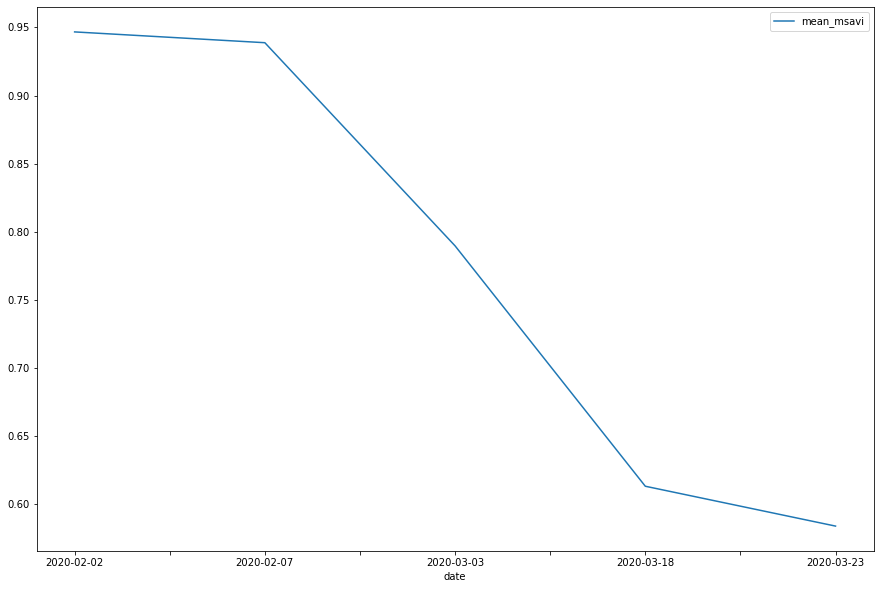

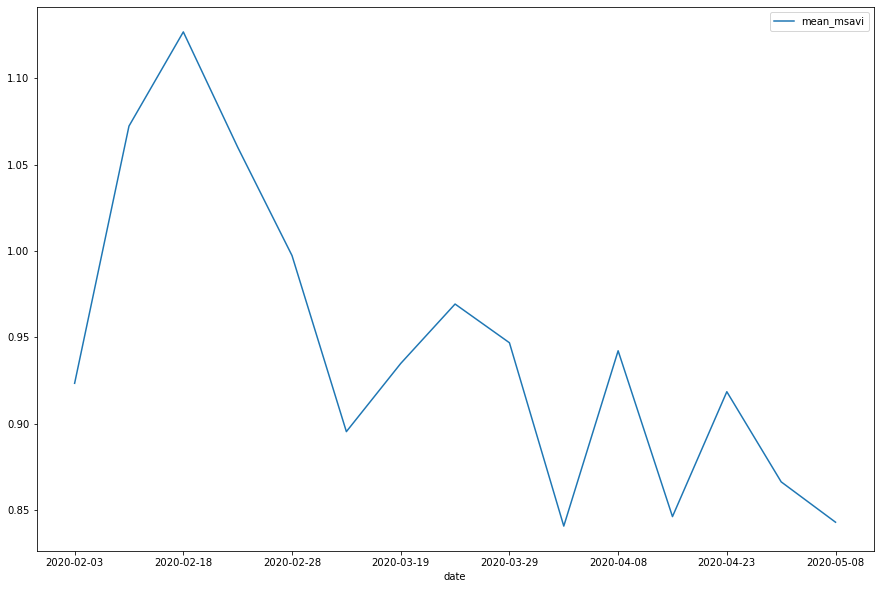

In [28]:
dir_path=r'F:/kawa space task/data_cloudmasked.csv'
df = pd.read_csv(dir_path)
keys = list(range(1,4))
for i in keys:
    df2= df[df['place'].astype('int')==i][['date', 'mean_msavi','cloudcover','min_msavi']]
    df2.plot(x = "date", y = ['mean_msavi'], kind = "line", figsize = (15,10))
    plt.savefig('F:/kawa space task/graph/%03d.jpg'%i)

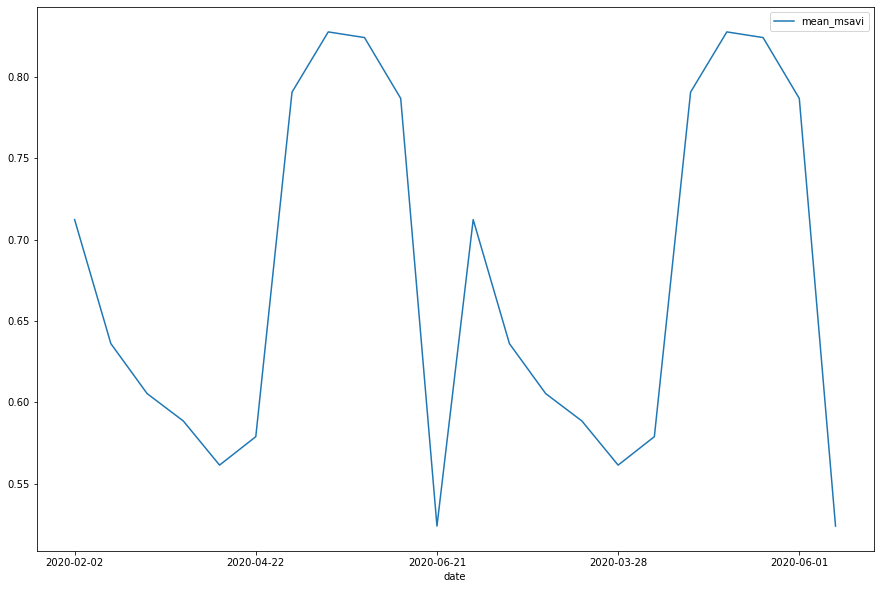

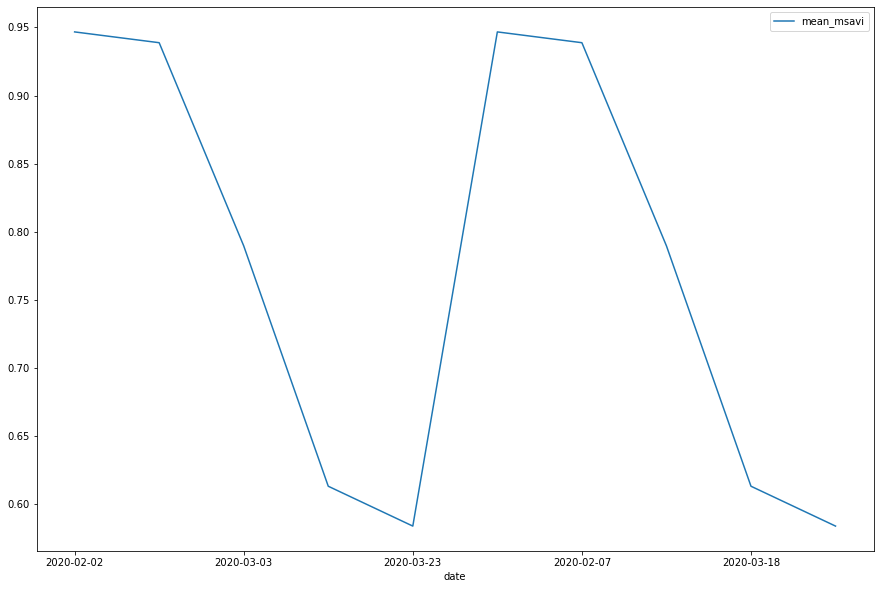

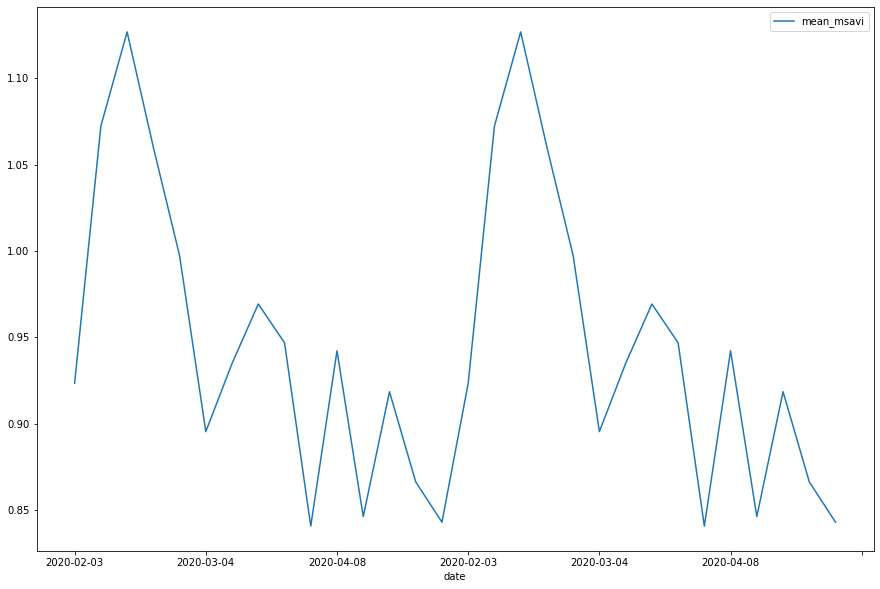

In [12]:
df= pd.read_csv('F:/kawa space task/data2.csv')
df = pd.read_csv(dir_path)
keys = list(range(1,4))
for i in keys:
    df2= df[df['place'].astype('int')==i][['date', 'mean_msavi','cloudcover','min_msavi']]
    df2.plot(x = "date", y = ['mean_msavi'], kind = "line", figsize = (15,10))